# Import data
Import data from a file containing the preprocessed dataset.

In [83]:
import pandas as pd
import os

V1 = 'First'
V2 = 'Second'
V3 = 'Third'

# depending on the OS the path to the data file is different
if os.name == 'nt':
    first_data = pd.read_csv(r'..\data\generated\first-preprocessed-data-classification.csv')
    second_data = pd.read_csv(r'..\data\generated\second-preprocessed-data-classification.csv')
    third_data = pd.read_csv(r'..\data\generated\third-preprocessed-data-classification.csv')

    food_groups = pd.read_excel(r'..\data\food-groups.xls')
elif os.name == 'posix':
    first_data = pd.read_csv(r'../data/generated/first-preprocessed-data-classification.csv')
    first_data = pd.read_csv(r'../data/generated/second-preprocessed-data-classification.csv')
    first_data = pd.read_csv(r'../data/generated/third-preprocessed-data-classification.csv')

    food_groups = pd.read_excel(r'../data/food-groups.xls')

# filter food groups with 'Food Group Code' with length 2
food_groups = food_groups[food_groups['Food Group Code'].apply(lambda x: len(str(x)) == 2)]


print('First version of food groups:')
first_data.head()

First version of food groups:


,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,C22:5w3 (mg),C22:4w6 (mg),C22:6w3 (mg),"Total polyunsaturated fatty acids, equated \n(g)","Total long chain omega 3 fatty acids, equated \n(mg)","Total undifferentiated fatty acids, mass basis basis \n(mg)","Total trans fatty acids, imputed \n(mg)",Cholesterol \n(mg),Tryptophan \n(mg/gN),Tryptophan \n(mg)
0,F002258,31,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,0.00,31.0,0.0,1.39,0.000,31.0,0.0,0,90.0,155
1,F002893,31,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,0.00,31.0,0.0,6.69,0.000,31.0,0.0,0,32.0,69
2,F002963,31,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,0.00,31.0,0.0,0.12,0.000,31.0,0.0,0,77.0,49
3,F002970,31,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,255.52,31.0,0.0,5.03,266.581,31.0,0.0,0,31.0,30
4,F003190,31,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0.00,31.0,0.0,1.82,0.000,31.0,0.0,0,90.0,178


---
# Prepare data
1. Determine the target variable.
2. Determine the features.
3. Split the data into training and test sets.

In [84]:
def feat_and_target(data, v):
    # use nutrition columns as features
    X_COLS = list(data.columns[3:])

    # use classification column as target
    y_COL = data.columns[1]

    print(f"{v} version:")
    print(f"X_COLS: {X_COLS}")
    print(f"y_COL: {y_COL}\n")
    return X_COLS, y_COL

first_X_COLS, first_y_COL = feat_and_target(first_data, V1)
second_X_COLS, second_y_COL = feat_and_target(second_data, V2)
third_X_COLS, third_y_COL = feat_and_target(third_data, V3)

First version:
X_COLS: ['Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Total sugars (g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Citric acid \n(g)', 'Lactic acid \n(g)', 'Malic acid\n (g)', 'Oxalic acid \n(g)', 'Quinic acid \n(g)', 'Calcium (Ca) \n(mg)', 'Chloride (Cl) \n(mg)', 'Copper (Cu) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Sulphur (S) \n(mg)', 'Zinc (Zn) \n(mg)', 'Retinol (preformed vitamin A) \n(ug)', 'Alpha-carotene \n(ug)', 'Beta-carotene \n(ug)', 'Cryptoxanthin \n(ug)', 'Beta-carotene equivalents (provitamin A) \n(ug)'

In [85]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_test_data(data, X_COLS, y_COL):
    # split data into train and test sets
    train, test = train_test_split(data, test_size=0.15, random_state=43)

    # create design matrix X and predictions y
    X_train = train[X_COLS]
    y_train = train[y_COL]
    X_test = test[X_COLS]
    y_test = test[y_COL]

    # replace NaN values with 0
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)
    y_train = y_train.fillna(0)
    y_test = y_test.fillna(0)

    return X_train, y_train, X_test, y_test

first_X_train, first_y_train, first_X_test, first_y_test = train_test_data(first_data, first_X_COLS, first_y_COL)
second_X_train, second_y_train, second_X_test, second_y_test = train_test_data(second_data, second_X_COLS, second_y_COL)
third_X_train, third_y_train, third_X_test, third_y_test = train_test_data(third_data, third_X_COLS, third_y_COL)

print(first_y_train.head(50))
# print(second_X_test)
# print(third_X_test)


243     31
423     31
978     18
48      31
530     31
393     31
1433    24
565     16
1361    31
1415    24
751     18
29      31
1346    31
596     16
391     31
834     18
127     31
1220    15
694     31
384     31
681     31
935     18
1604    24
640     16
261     12
381     31
233     31
920     18
427     31
189     12
965     18
1208    15
1206    15
742     18
539     31
119     31
1409    24
114     31
1199    31
1204    15
34      31
207     12
1522    24
500     31
1336    31
983     18
228     31
1060    18
1234    15
36      31
Name: Classification, dtype: int64


---
# $k$-nn
We create a $k$-nn model which is used to classify a food into different food groups based on its nutritional information.

First we determine the best $k$ value based on the accuracy of different models.

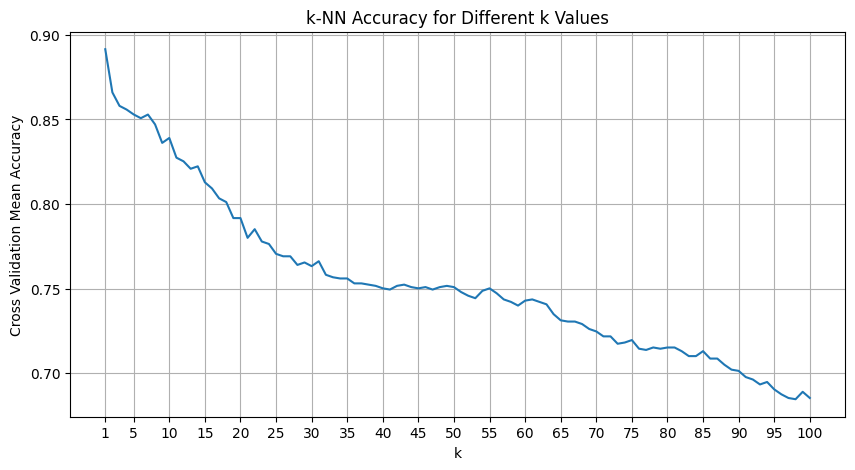

First version:
[[0.8915053422194014, 1], [0.8660055008991854, 2], [0.858029197080292, 3], [0.8558447053845339, 4], [0.8529461546598964, 5], [0.8528985507246377, 7], [0.8507510843118586, 6], [0.8470750026446631, 8], [0.8390616735427905, 10], [0.8361472548397334, 9], [0.827430445361261, 11], [0.825245953665503, 12], [0.8223050883317466, 14], [0.8208611022955676, 13], [0.8128530625198349, 15], [0.8092192954617582, 16], [0.8033851687295039, 17], [0.8011848090553265, 18], [0.7917222045911351, 19], [0.7917116259388554, 20], [0.7851528615254417, 22], [0.7800433724743467, 21], [0.7778747487570083, 23], [0.7764148947424098, 24], [0.7705860573362953, 25], [0.7691420713001164, 27], [0.7691420713001164, 26], [0.7662223632709193, 31], [0.7654977255897599, 29], [0.7640378715751613, 28], [0.7633185232201417, 30], [0.7582090341690468, 32], [0.7567438908283084, 33], [0.7560456997778483, 35], [0.7560351211255687, 34], [0.7531312810747911, 36], [0.7531259917486512, 37], [0.752396064741352, 43], [0.752396

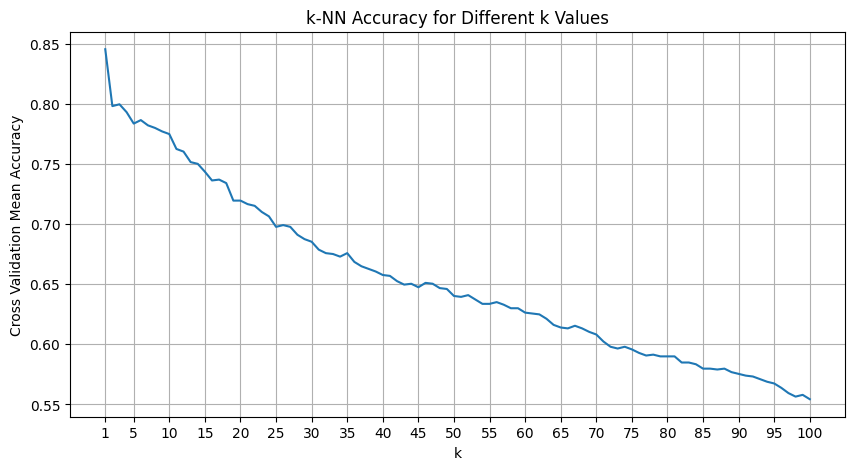

Second version:
[[0.845599280651645, 1], [0.7997619803237068, 3], [0.7982598116999895, 2], [0.7932137945625727, 4], [0.7866127155400402, 6], [0.7837194541415424, 5], [0.7822331534962446, 7], [0.780075108431186, 8], [0.7771606897281286, 9], [0.7749920660107902, 10], [0.7625991748651223, 11], [0.7603935258648049, 12], [0.7516449804294932, 13], [0.7502009943933142, 14], [0.74366338728446, 15], [0.7370887548926267, 17], [0.7363746958637469, 16], [0.7341796255157093, 18], [0.719612821326563, 20], [0.7196022426742832, 19], [0.7166878239712261, 21], [0.715249127261187, 22], [0.710139638210092, 23], [0.7065005818258754, 24], [0.6992330477097218, 26], [0.6977626150428435, 27], [0.6977626150428435, 25], [0.6911985613032899, 28], [0.6875489262667936, 29], [0.6853697238971754, 30], [0.6787950915053422, 31], [0.6758965407807046, 35], [0.6758859621284249, 32], [0.6751613244472654, 33], [0.6729821220776474, 34], [0.6686078493599915, 36], [0.6649582143234951, 37], [0.6627843012800169, 38], [0.66061038

c:\Users\victo\Desktop\ass\comp20008-assignment-2\.venv\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\victo\Desktop\ass\comp20008-assignment-2\.venv\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\victo\Desktop\ass\comp20008-assignment-2\.venv\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\victo\Desktop\ass\comp20008-assignment-2\.venv\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\victo\Desktop\ass\comp20008-assignment-2\.venv\Lib\site-packages\sklearn\model_selectio

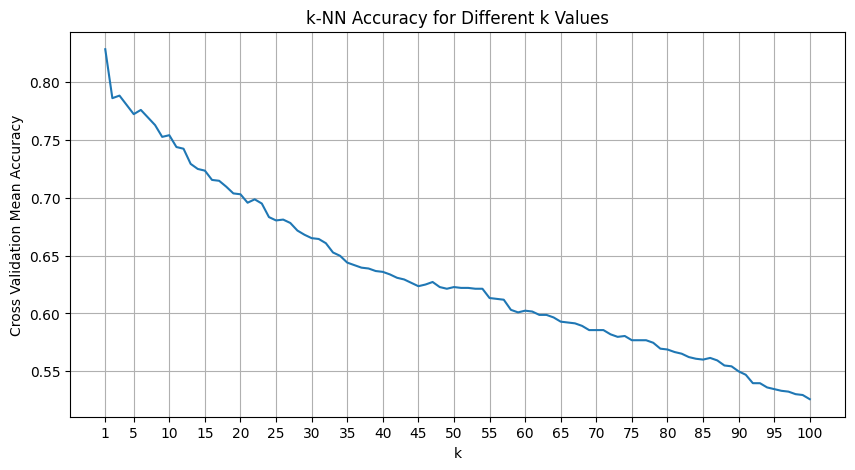

Third version:
[[0.8281392150640009, 1], [0.7880778588807786, 3], [0.785877499206601, 2], [0.7800803977573257, 4], [0.7757219930180896, 6], [0.7720723579815931, 5], [0.7691896752353751, 7], [0.7626309108219613, 8], [0.7538929440389295, 10], [0.7524436686766107, 9], [0.7436845445890194, 11], [0.742219401248281, 12], [0.7291336083782927, 13], [0.7247487570083571, 14], [0.7232994816460383, 15], [0.7152755738918862, 16], [0.7145456468845869, 17], [0.7094467364857717, 18], [0.7036390563842168, 19], [0.7028826827462181, 20], [0.6985189886808422, 22], [0.6955939913255051, 21], [0.6948746429704855, 23], [0.6831958108536973, 24], [0.6810271871363588, 26], [0.6803025494551994, 25], [0.6781233470855812, 27], [0.6715592933460278, 28], [0.6679149476356712, 29], [0.6650058182587537, 30], [0.6642758912514546, 31], [0.6606368348672379, 32], [0.6526287950915053, 33], [0.6497196657145878, 34], [0.6438908283084734, 35], [0.6416957579604358, 36], [0.6395218449169575, 37], [0.6387919179096583, 38], [0.6366

<Figure size 640x480 with 0 Axes>

In [86]:
# find the best k based on accuracy using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

def cross_validate(X_train, y_train, v):
    # create list of possible k values from 1 to 100
    k_values = list(range(1, 101))

    # create list of cross validation scores
    cv_scores = []

    # perform 10-fold cross validation for each k 
    # and take the mean of the scores
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # plot the accuracy for each k
    plt.plot(k_values, cv_scores)
    plt.xlabel("k")
    plt.ylabel("Cross Validation Mean Accuracy")

    # add xtick for every 5th k
    plt.xticks([1] + list(range(5, 101, 5)))

    plt.grid()
    plt.gcf().set_size_inches(10, 5)
    plt.title("k-NN Accuracy for Different k Values")

    # save the plot
    plt.savefig('../report/figs/knn-cross-validation.png', bbox_inches='tight')
    plt.show()
    plt.clf()

    # find best k, other than k of 1
    cv_scores = [[score, k] for score, k in zip(cv_scores, k_values)]
    cv_scores = sorted(cv_scores)
    if cv_scores[::-1][0][1] == 1:
        best_k = cv_scores[::-1][1][1]
        best_k_accuracy = cv_scores[::-1][1][0]
    else:
        best_k = cv_scores[::-1][0][1]
        best_k_accuracy = cv_scores[::-1][0][0]

    print(f"{v} version:")
    print(cv_scores[::-1])
    print(f"Best k: {best_k}")
    print(f"Best k accuracy: {best_k_accuracy}\n")

    return best_k

first_best_k = cross_validate(first_X_train, first_y_train, V1)
second_best_k = cross_validate(second_X_train, second_y_train, V2)
third_best_k = cross_validate(third_X_train, third_y_train, V3)

In [87]:
import numpy as np
# create knn with best_k neighbors
first_knn = KNeighborsClassifier(n_neighbors=first_best_k)
# train the model using the training set
first_knn.fit(first_X_train, first_y_train)
# get first y prediction
first_y_pred = first_knn.predict(first_X_test)


# create knn with best_k neighbors
second_knn = KNeighborsClassifier(n_neighbors=second_best_k)
# train the model using the training set
second_knn.fit(second_X_train, second_y_train)
# get first y prediction
second_y_pred = second_knn.predict(second_X_test)


# create knn with best_k neighbors
third_knn = KNeighborsClassifier(n_neighbors=third_best_k)
# train the model using the training set
third_knn.fit(third_X_train, third_y_train)
# get first y prediction
third_y_pred = third_knn.predict(third_X_test)


[24 31 24 31 18 18 31 31 31 31 18 31 24 15 18 18 24 18 24 15 16 18 31 24
 31 12 24 16 15 18 18 18 31 18 16 31 12 31 18 24 31 18 31 18 18 31 31 12
 24 18 18 15 15 18 18 18 12 18 12 31 18 31 18 18 31 12 31 18 12 18 18 16
 24 15 31 12 18 18 31 31 31 31 16 18 18 15 24 18 18 18 12 12 24 24 24 31
 18 31 18 18 24 24 31 18 12 18 12 18 16 31 31 31 24 15 18 15 18 24 18 16
 24 16 24 18 18 31 18 18 12 18 31 12 18 12 24 18 18 12 18 15 18 18 18 31
 18 24 24 18 15 31 18 18 12 18 24 31 12 15 18 24 12 31 18 18 31 31 16 18
 18 18 31 18 16 24 18 12 18 31 18 24 18 12 18 31 31 31 18 24 24 18 12 31
 18 18 12 18 31 31 15 31 18 18 18 18 12 31 12 31 12 18 24 31 31 18 18 31
 18 12 16 18 18 31 24 31 15 31 15 31 12 18 18 18 24 16 15 31 18 16 15 18
 15 12 31]
[24 22 24 31 18 18 28 13 11 23 18 31 24 15 18 18 13 18 24 15 16 18 11 24
 31 12 24 16 15 18 18 18 31 18 16 13 12 14 18 24 23 31 22 18 18 11 31 12
 24 18 18 15 15 18 18 18 12 18 12 13 18 19 18 18 14 31 14 18 12 18 18 16
 24 15 13 12 18 18 14 31 14 13 16 18 18 

## Evaluation
Calculate certain metrics to evaluate the model.

### Accuracy

In [88]:
# check the accuracy
from sklearn.metrics import accuracy_score

def print_accuracy_and_predictions(y_test, y_pred, v):
    print(f"{v} version:")
    # y_test constains the true labels of the test set
    # y_pred contains the predicted labels of the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\tAccuracy: {accuracy}")

    # compare manually predicted labels with the true labels
    print(f"\tFirst few predictions: {y_pred[:10]}")
    print(f"\tFirst few true labels: {y_test[:10].values}\n")

    return accuracy
    
print_accuracy_and_predictions(first_y_test, first_y_pred, V1)
print_accuracy_and_predictions(second_y_test, second_y_pred, V2)
print_accuracy_and_predictions(third_y_test, third_y_pred, V3)

First version:
	Accuracy: 0.897119341563786
	First few predictions: [24 31 24 31 18 18 31 31 31 31]
	First few true labels: [24 31 24 31 18 31 31 31 31 31]

Second version:
	Accuracy: 0.8518518518518519
	First few predictions: [24 22 24 31 18 18 28 13 11 23]
	First few true labels: [24 22 24 31 18 31 28 31 19 13]

Third version:
	Accuracy: 0.823045267489712
	First few predictions: [24 22 24 27 18 12 28 13 11 23]
	First few true labels: [24 22 24 27 18 17 28 31 19 13]



0.823045267489712

### Confusion Matrix

First version:
Correct predictions per food group:
24: 26 (Vegetable products and dishes)
31: 57 (Miscellaneous)
18: 85 (Meat, poultry and game products and dishes)
15: 18 (Fish and seafood products and dishes)
16: 9 (Fruit products and dishes)
12: 23 (Cereals and cereal products)


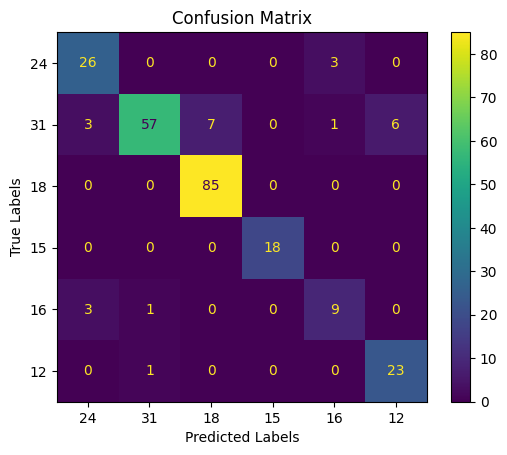

Second version:
Correct predictions per food group:
24: 27 (Vegetable products and dishes)
22: 3 (Seed and nut products and dishes)
31: 10 (Miscellaneous)
18: 84 (Meat, poultry and game products and dishes)
28: 2 (Confectionery and cereal/nut/fruit/seed bars)
19: 7 (Milk products and dishes)
13: 10 (Cereal based products and dishes)
15: 17 (Fish and seafood products and dishes)
16: 7 (Fruit products and dishes)
11: 6 (Non-alcoholic beverages)
12: 23 (Cereals and cereal products)
14: 7 (Fats and oils)
23: 4 (Savoury sauces and condiments)


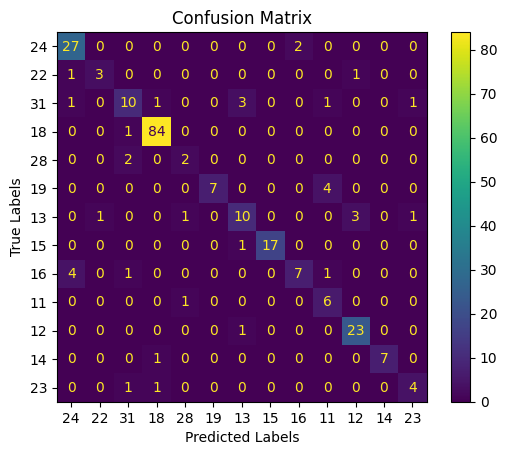

Third version:
Correct predictions per food group:
24: 24 (Vegetable products and dishes)
22: 3 (Seed and nut products and dishes)
27: 2 (Sugar products and dishes)
18: 83 (Meat, poultry and game products and dishes)
17: 0 (Egg products and dishes)
28: 2 (Confectionery and cereal/nut/fruit/seed bars)
31: 1 (Miscellaneous)
19: 8 (Milk products and dishes)
13: 9 (Cereal based products and dishes)
25: 2 (Legume and pulse products and dishes)
15: 16 (Fish and seafood products and dishes)
16: 7 (Fruit products and dishes)
11: 4 (Non-alcoholic beverages)
12: 23 (Cereals and cereal products)
14: 7 (Fats and oils)
21: 1 (Soup)
20: 2 (Dairy & meat substitutes)
26: 0 (Snack foods)
23: 5 (Savoury sauces and condiments)
29: 1 (Alcoholic beverages)


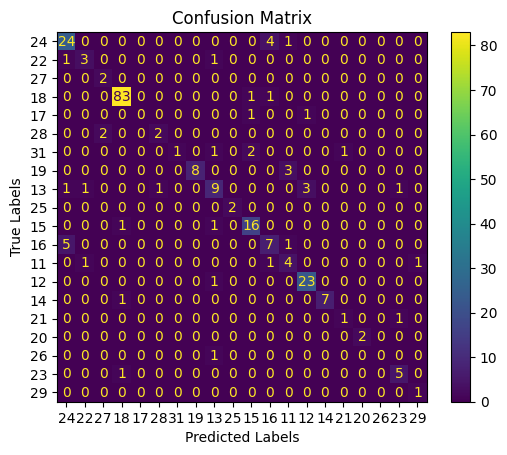

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def print_cm(y_test, y_pred, v, save_fig=False):
    print(f"{v} version:")

    # count the number of correct predictions
    print("Correct predictions per food group:")
    for value in y_test.unique():
        correct = 0
        for i in range(len(y_test)):
            if y_test.values[i] == y_pred[i] and y_test.values[i] == value:
                correct += 1
        food_group_name = food_groups[food_groups['Food Group Code'] == value]['Food Group and Sub-Group Name'].values[0].strip()
        print(f"{value}: {correct} ({food_group_name})")

    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=y_test.unique())

    # create confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # plot confusion matrix
    disp.plot()
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # plot the labels on the x and y axis
    plt.xticks(range(len(y_test.unique())), y_test.unique())
    plt.yticks(range(len(y_test.unique())), y_test.unique())

    plt.show()

    if save_fig:
        disp.figure_.savefig('../report/figs/knn-confusion-matrix.png', bbox_inches='tight')

print_cm(first_y_test, first_y_pred, V1, save_fig=True)
print_cm(second_y_test, second_y_pred, V2, save_fig=True)
print_cm(third_y_test, third_y_pred, V3, save_fig=True)


### Cross Validation


First version:
	Accuracy: 0.9004329004329005
	First few predictions: [24 31 18 31 31 31 31 31 31 31]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

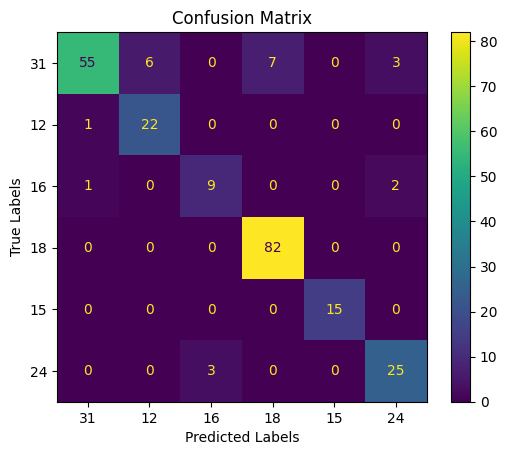

First version:
	Accuracy: 0.8354978354978355
	First few predictions: [31 15 12 12 31 31 31 31 16 12]
	First few true labels: [31 31 12 24 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

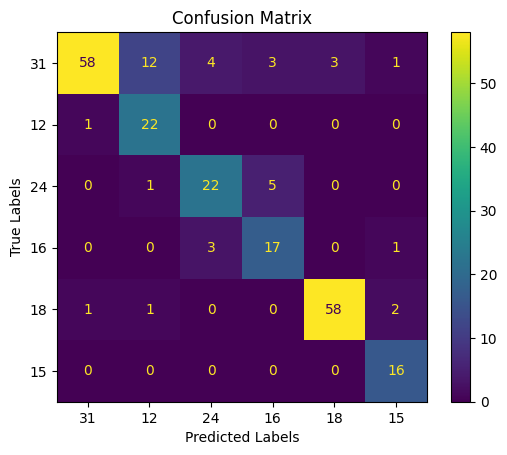

First version:
	Accuracy: 0.8917748917748918
	First few predictions: [31 24 16 31 31 31 31 31 12 31]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

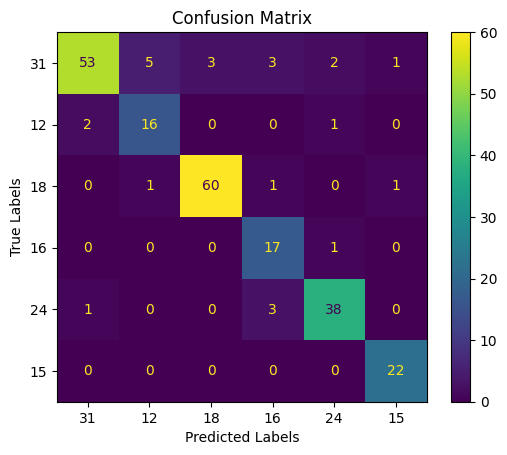

First version:
	Accuracy: 0.8484848484848485
	First few predictions: [24 31 16 31 31 16 31 31 31 31]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

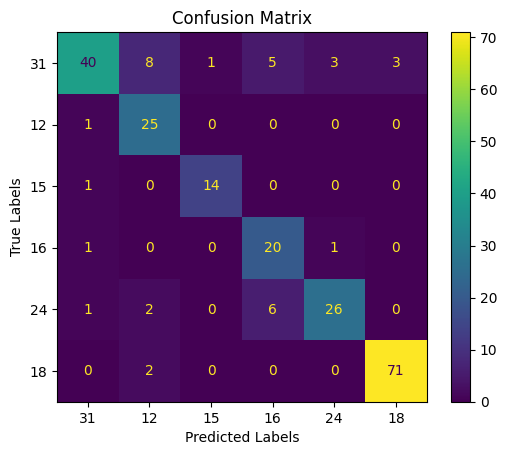

First version:
	Accuracy: 0.8398268398268398
	First few predictions: [31 31 24 31 31 24 16 24 31 31]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

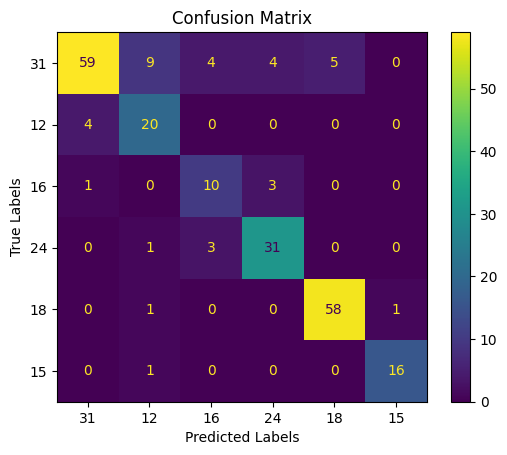

First version:
	Accuracy: 0.8961038961038961
	First few predictions: [16 31 31 16 31 31 31 31 24 31]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

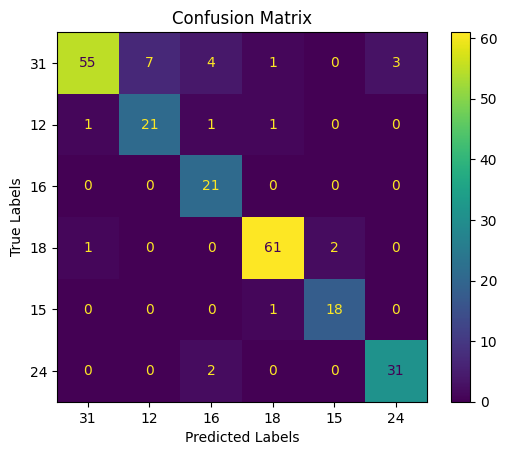

First version:
	Accuracy: 0.8608695652173913
	First few predictions: [31 31 16 31 31 31 31 16 31 24]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

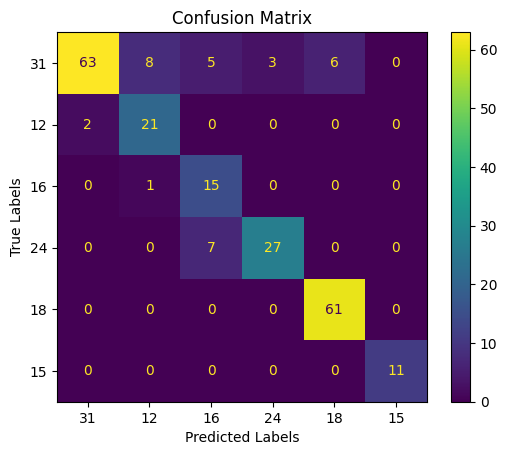

First average accuracy score across 7 CV splits: 0.8675701110483719
Second version:
	Accuracy: 0.8614718614718615
	First few predictions: [24 31 13 31 11 11 28 11 11 11]
	First few true labels: [31 31 31 31 11 11 11 11 11 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21     

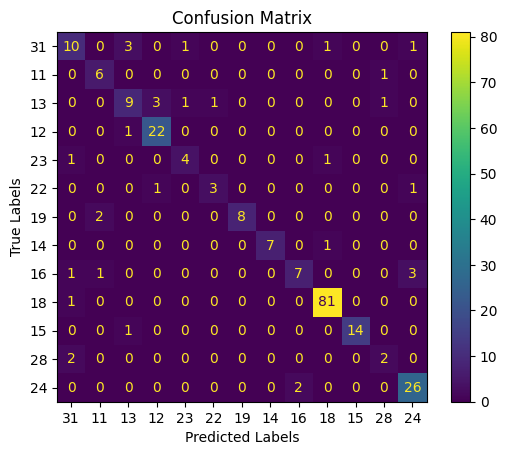

Second version:
	Accuracy: 0.7662337662337663
	First few predictions: [28 11 12 12 11 31 31 31 31 12]
	First few true labels: [31 31 12 24 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22     

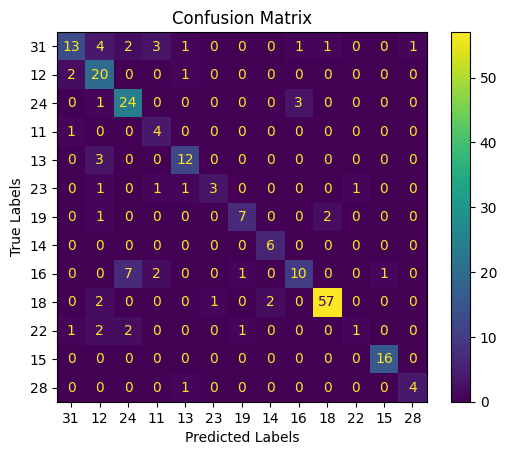

Second version:
	Accuracy: 0.8095238095238095
	First few predictions: [31 16 16 31 31 31 31 11 12 11]
	First few true labels: [31 31 31 31 31 31 31 31 31 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22     

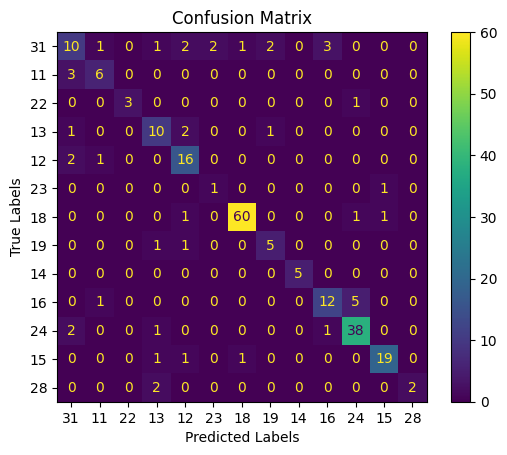

Second version:
	Accuracy: 0.8008658008658008
	First few predictions: [24 31 13 31 31 15 31 11 31 31]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22     

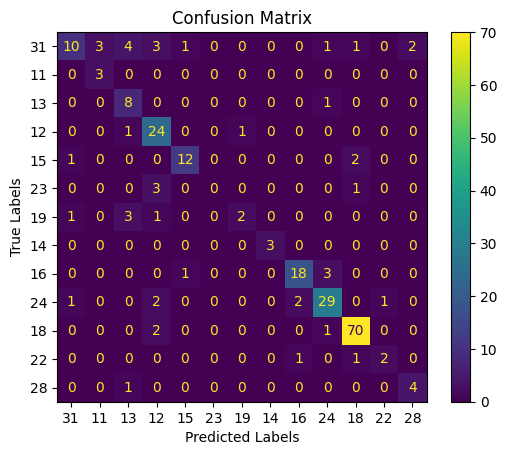

Second version:
	Accuracy: 0.7922077922077922
	First few predictions: [31 22 24 31 31 12 16 16 31 31]
	First few true labels: [31 31 31 31 31 31 31 31 31 31]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22     

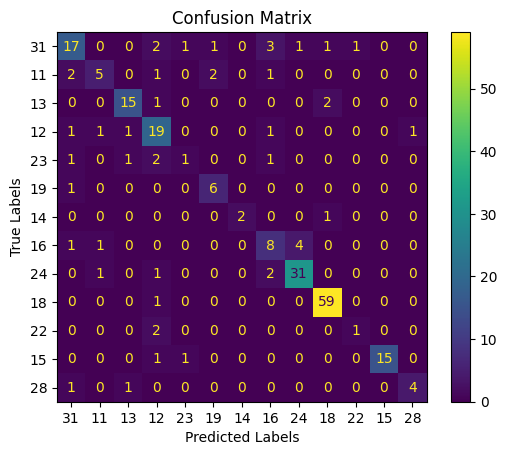

Second version:
	Accuracy: 0.8225108225108225
	First few predictions: [16 31 31 31 11 31 11 31 24 11]
	First few true labels: [31 31 31 31 31 31 31 31 11 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22     

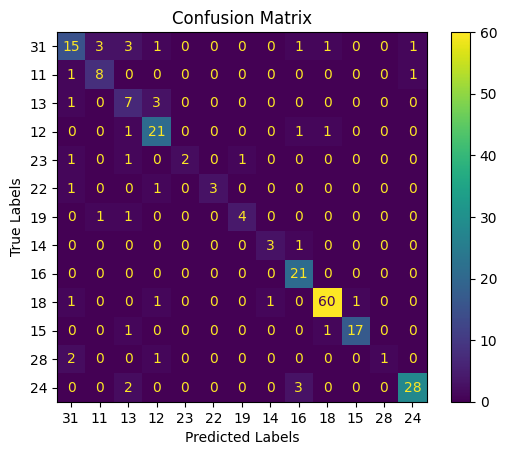

Second version:
	Accuracy: 0.8347826086956521
	First few predictions: [11 31 31 31 31 31 31 16 31 24]
	First few true labels: [31 31 31 31 31 31 31 31 31 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22     

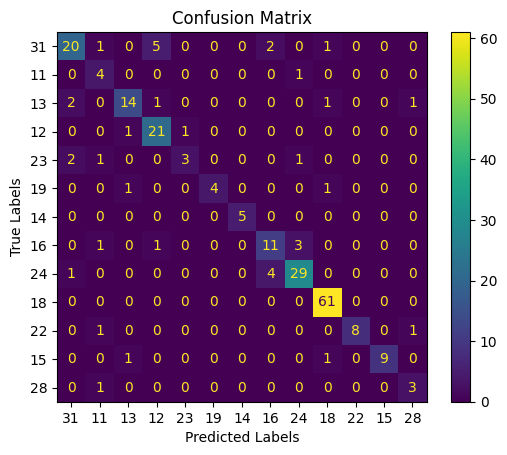

Second average accuracy score across 7 CV splits: 0.8125137802156435
Third version:
	Accuracy: 0.8268398268398268
	First few predictions: [31 21 15 29 11 11 22 29 11 11]
	First few true labels: [31 31 31 29 11 11 11 11 11 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21     

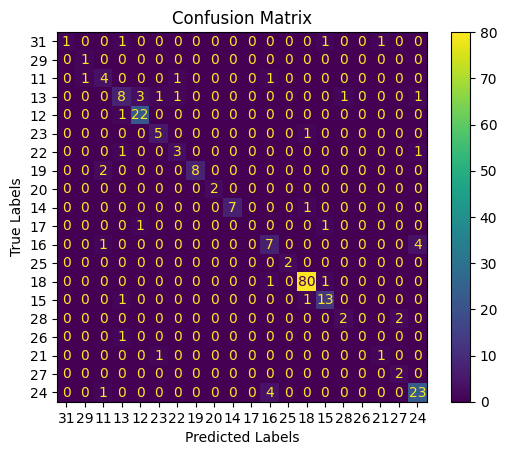

Third version:
	Accuracy: 0.7792207792207793
	First few predictions: [28 15 12 12 11 29 29 29 11 12]
	First few true labels: [31 31 12 24 31 29 29 29 29 29]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

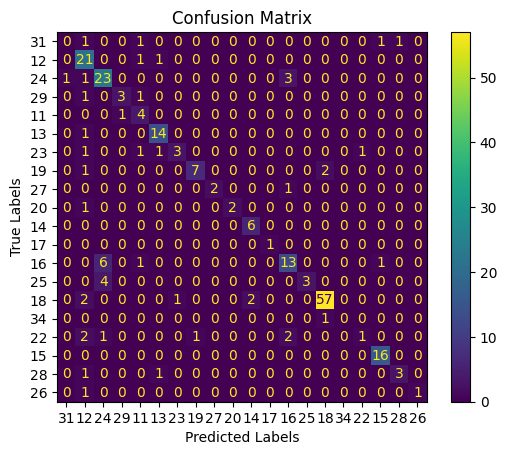

Third version:
	Accuracy: 0.7792207792207793
	First few predictions: [31 16 16 31 27 29 29 11 12 11]
	First few true labels: [31 31 31 31 29 29 29 29 30 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

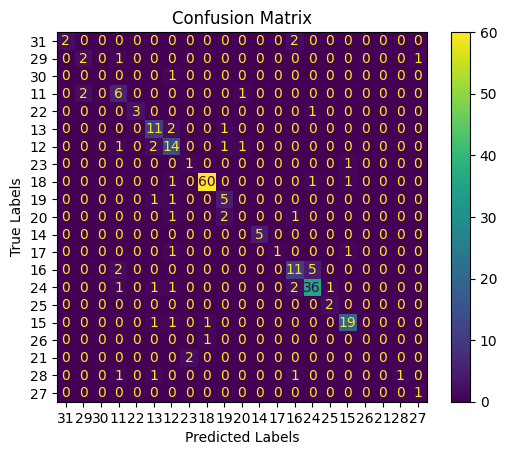

Third version:
	Accuracy: 0.7965367965367965
	First few predictions: [24 31 13 31 31 15 29 29 29 29]
	First few true labels: [31 31 31 31 31 31 29 29 29 29]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

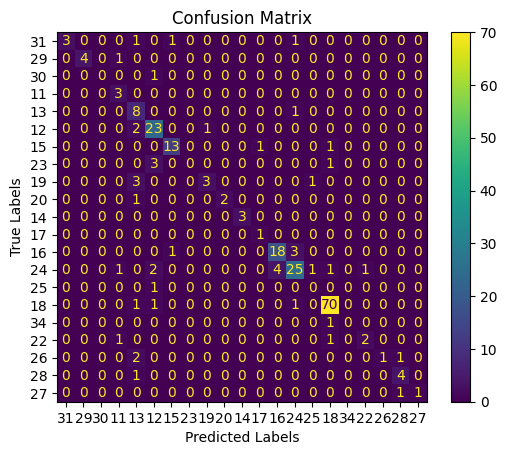

Third version:
	Accuracy: 0.7878787878787878
	First few predictions: [31 22 24 31 21 25 16 16 29 29]
	First few true labels: [31 31 31 31 31 31 29 29 29 29]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

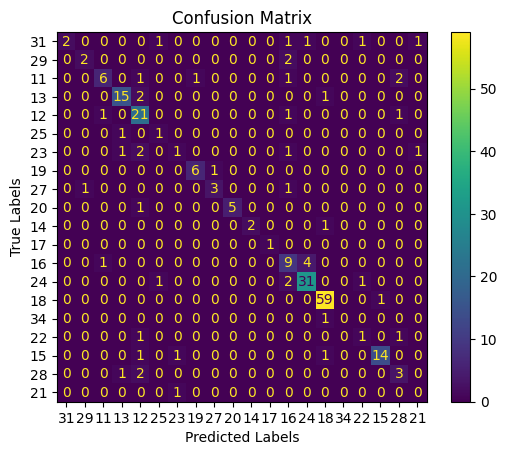

Third version:
	Accuracy: 0.7835497835497836
	First few predictions: [16 31 31 31 11 27 11 29 24 11]
	First few true labels: [31 31 31 31 31 31 29 29 11 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

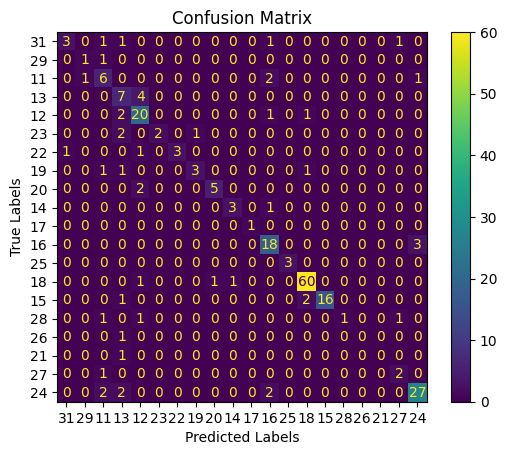

Third version:
	Accuracy: 0.7956521739130434
	First few predictions: [31 31 29 29 29 29 29 29 11 24]
	First few true labels: [31 31 29 29 29 29 29 29 29 11]

     Food Group Code                  Food Group and Sub-Group Name
0                 11                        Non-alcoholic beverages
56                12                   Cereals and cereal products 
110               13               Cereal based products and dishes
165               14                                 Fats and oils 
192               15          Fish and seafood products and dishes 
219               16                     Fruit products and dishes 
259               17                       Egg products and dishes 
269               18    Meat, poultry and game products and dishes 
324               19                      Milk products and dishes 
386               20                       Dairy & meat substitutes
409               21                                          Soup 
428               22      

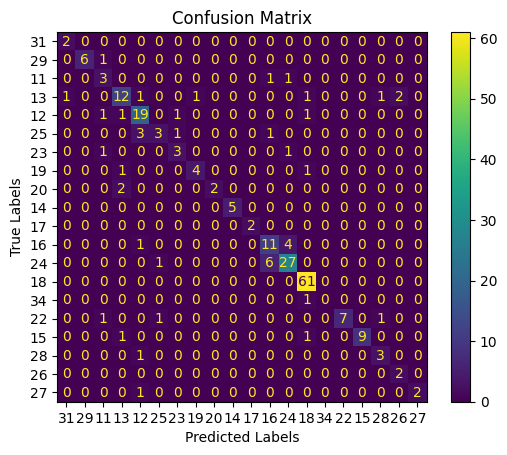

Third average accuracy score across 7 CV splits: 0.7926998467371138


In [98]:
from sklearn.model_selection import KFold
SPLIT_COUNT = 7

def cross_val_print(X_train, y_train, X_test, y_test, y_pred, k_val, data, X_COLS, y_COL, v):
    # splits the data into subsets
    kfold = KFold(n_splits=SPLIT_COUNT, shuffle=True, random_state=43)

    accuracy_scores = []
    for train, test in kfold.split(data):
        # create design matrix X and predictions y
        X_train = data.iloc[train][X_COLS]
        y_train = data.iloc[train][y_COL]
        X_test = data.iloc[test][X_COLS]
        y_test = data.iloc[test][y_COL]

        # reinitialise knn model
        knn = KNeighborsClassifier(n_neighbors=k_val)

        # train the model using the training subset
        knn.fit(X_train, y_train)
        
        # predict and show
        y_pred = knn.predict(X_test)

        print_accuracy_and_predictions(y_test, y_pred, v)
        print_cm(y_test, y_pred, food_groups, v)

        # add accuracy to list
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    # print average accuracy
    print(f"{v} average accuracy score across {len(accuracy_scores)} CV splits: {sum(accuracy_scores) / len(accuracy_scores)}")

cross_val_print(first_X_train, first_y_train, first_X_test, first_y_test, first_y_pred, first_best_k, first_data, first_X_COLS, first_y_COL, V1)
cross_val_print(second_X_train, second_y_train, second_X_test, second_y_test, second_y_pred, second_best_k, second_data, second_X_COLS, second_y_COL, V2)
cross_val_print(third_X_train, third_y_train, third_X_test, third_y_test, third_y_pred, third_best_k, third_data, third_X_COLS, third_y_COL, V3)


### Bootstrap Validation

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score
import seaborn as sns

N_BOOTSTRAPS = 1000
boot_accuracies = []
boot_recalls = []
boot_precisions = []
boot_f1s = []

dataid_x = range(np.asarray(X_COLS).shape[0])

for i in range(N_BOOTSTRAPS):
    
    X_boot, y_boot = resample(X_train, y_train, replace=True)
    
    # predict
    y_pred_boot = knn.predict(X_boot)
    
    # evaluate
    boot_accuracies.append(accuracy_score(y_boot, y_pred_boot))
    boot_recalls.append(recall_score(y_boot, y_pred_boot, average='macro'))
    boot_precisions.append(precision_score(y_boot, y_pred_boot, average='macro'))
    boot_f1s.append(f1_score(y_boot, y_pred_boot, average='macro'))

# print results
print(f"Bootstrapped accuracies: {boot_accuracies}")
print(f"Bootstrapped recalls: {boot_recalls}")
print(f"Bootstrapped precisions: {boot_precisions}")
print(f"Bootstrapped f1s: {boot_f1s}")
# print averages
print(f"Mean accuracy: {np.mean(boot_accuracies)}")
print(f"Mean recall: {np.mean(boot_recalls)}")
print(f"Mean precision: {np.mean(boot_precisions)}")
print(f"Mean f1: {np.mean(boot_f1s)}")

# plot distribution of accuracy
sns.kdeplot(boot_accuracies)
plt.title(f"Accuracy across {N_BOOTSTRAPS} bootstrap samples")
plt.xlabel("Accuracy")
plt.show()

# plot distribution of recall
sns.kdeplot(boot_recalls)
plt.title(f"Recall across {N_BOOTSTRAPS} bootstrap samples")
plt.xlabel("Recall")
plt.show()

# plot distribution of precision
sns.kdeplot(boot_precisions)
plt.title(f"Precision across {N_BOOTSTRAPS} bootstrap samples")
plt.xlabel("Precision")
plt.show()

# plot distribution of f1
sns.kdeplot(boot_f1s)
plt.title(f"F1 across {N_BOOTSTRAPS} bootstrap samples")
plt.xlabel("F1")
plt.show()

NameError: name 'X_COLS' is not defined